In [33]:
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/home/joy9168/Downloads/dogs-vs-cats/train"
test_dir = "/home/joy9168/Downloads/dogs-vs-cats/test1"
### ImageDataGenrator is powerful tool and save time 
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    directory="/home/joy9168/Downloads/dogs-vs-cats",
    classes=['test1'],              # points to the test folder
    target_size=(128, 128),
    color_mode='grayscale',        # match training
    class_mode=None,               # no labels for test data
    batch_size=32,
    shuffle=False                  # keep filenames in order
)

######  data genratimg from directory pictures it is easy way to rather than using numpy
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    color_mode= 'grayscale',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    color_mode= 'grayscale',
    subset='validation'
)
##check it and read it for later purpose
train_data.class_indices


Found 12500 images belonging to 1 classes.
Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [34]:
##check what is keras is producing important 
images, labels = next(train_data)
print(images.shape)  # (32, 128, 128, 3) if I donot change the pictures to grayscale 
print(labels.shape)  # (32,)


(32, 128, 128, 1)
(32,)


In [37]:
##producing the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 1)),  
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3), # deactive 30% of neuron to get more better result on unseen data
    Dense(1, activation='sigmoid')  # we need one output (dog vs cat) that's why
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_data, validation_data=val_data, epochs=10)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 101ms/step - accuracy: 0.6480 - loss: 0.6278 - val_accuracy: 0.7318 - val_loss: 0.5426
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.7689 - loss: 0.4846 - val_accuracy: 0.7544 - val_loss: 0.4971
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.8119 - loss: 0.4063 - val_accuracy: 0.7786 - val_loss: 0.4765
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 101ms/step - accuracy: 0.8615 - loss: 0.3192 - val_accuracy: 0.7740 - val_loss: 0.4994
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 102ms/step - accuracy: 0.9093 - loss: 0.2196 - val_accuracy: 0.7948 - val_loss: 0.5485
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - accuracy: 0.9476 - loss: 0.1372 - val_accuracy: 0.7872 - val_loss: 0.6069
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 108ms/step - accuracy: 0.9704 - loss: 0.0825 - val_accuracy: 0.7908 - val_loss: 0.7788
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 66s 105ms/step - accuracy: 0.9815 - loss: 0

In [26]:
pred_result=model.predict(test_data)

391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step


array([[0.96776414],
       [0.20412502],
       [0.73310363],
       ...,
       [0.6441263 ],
       [0.01403272],
       [0.03830753]], shape=(12500, 1), dtype=float32)

391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step


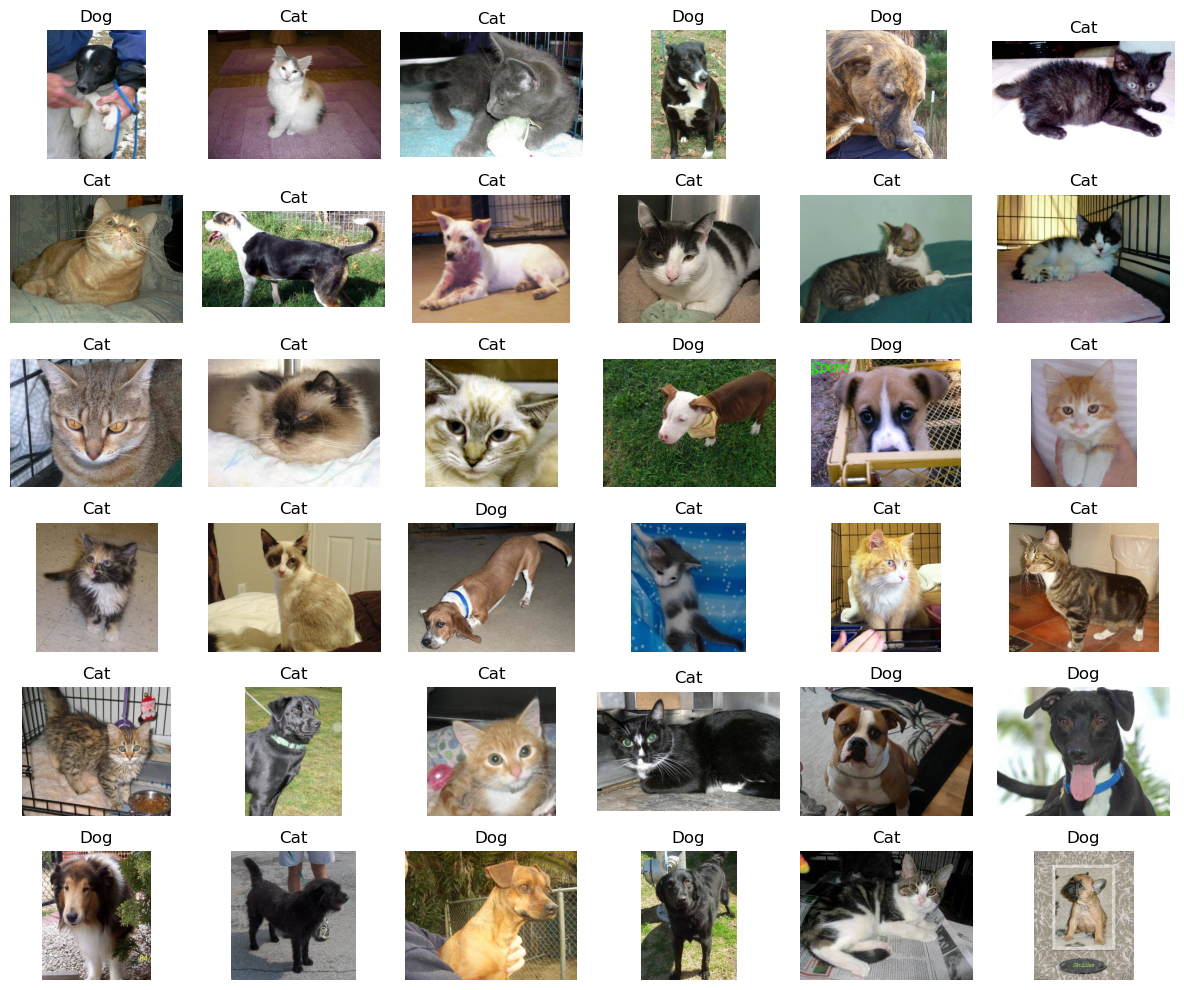

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Get prediction probabilities
predictions = model.predict(test_data, verbose=1)

# Convert probabilities → class labels (0 = Cat, 1 = Dog)
predicted_classes = (predictions > 0.5).astype(int)

# Label names for display
labels = ['Cat', 'Dog']

# Get file paths of images (so we can display them)
filenames = test_data.filenames

plt.figure(figsize=(12, 10))

for i in range(36):
    img_path = os.path.join(test_dir, os.path.basename(filenames[i]))
    img = plt.imread(img_path)
    
    plt.subplot(6, 6, i + 1)
    plt.imshow(img, cmap='gray')  # works fine for grayscale or RGB
    plt.title(labels[predicted_classes[i][0]])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
###  check this code with 100*100 pixel image ,maybe some tweaking with model to get better result